## xgboost 예측모델


In [12]:
import numpy as np
import pandas as pd
import xgboost as xgb

import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import skew,kurtosis
%matplotlib inline

#xgboost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn. model_selection import cross_val_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'
data = pd.read_csv('dataset2.csv')




In [2]:
data 

## dataset2에서 허리둘레, 연령대, 감마지티피, (트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI 중 2개 선택)
## ==> 허리둘레, 연령대, 감마지티피,트리글리세라이드, LDL콜레스테롤

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,26.0
1,1,7,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0,25.0
2,1,9,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,28.0
3,1,11,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,0.0,26.0
4,1,11,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.0,0.9,1.2,1.0,1.0,160.0,...,15.2,1.0,1.0,34.0,12.0,78.0,1.0,1.0,0.0,24.0
1180116,1,8,180,65,77.0,1.2,1.2,1.0,1.0,123.0,...,15.9,1.0,1.0,11.0,8.0,15.0,3.0,1.0,0.0,20.0
1180117,2,14,155,55,83.0,0.2,0.6,1.0,1.0,146.0,...,12.4,1.0,0.7,21.0,15.0,23.0,1.0,0.0,0.0,23.0
1180118,2,14,155,55,84.0,0.9,1.2,1.0,1.0,130.0,...,12.9,1.0,0.8,29.0,14.0,19.0,1.0,0.0,0.0,23.0


In [3]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

## Under-sampling

In [4]:
print(data['당뇨여부'].value_counts())
# print(type(data))

# 당뇨 O : 1133541
# 당뇨 X : 46579

0.0    1133541
1.0      46579
Name: 당뇨여부, dtype: int64


In [5]:
x = data.drop(['당뇨여부','식전혈당(공복혈당)','성별코드', '신장(5Cm단위)', '체중(5Kg단위)', '시력(좌)','시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '총콜레스테롤', 'HDL콜레스테롤',  '혈색소', '요단백', '혈청크레아티닌','(혈청지오티)AST', '(혈청지오티)ALT', '흡연상태', '음주여부'], axis=1)
print(x)

## 허리둘레, 연령대, 감마지티피,트리글리세라이드, LDL콜레스테롤, BMI

         연령대코드(5세단위)  허리둘레  트리글리세라이드  LDL콜레스테롤  감마지티피   BMI
0                  8  90.0      92.0     126.0   40.0  26.0
1                  7  89.0     121.0     148.0   27.0  25.0
2                  9  91.0     104.0      74.0   68.0  28.0
3                 11  91.0     106.0     104.0   18.0  26.0
4                 11  80.0     104.0     117.0   25.0  22.0
...              ...   ...       ...       ...    ...   ...
1180115           13  84.0      85.0     140.0   78.0  24.0
1180116            8  77.0     139.0      60.0   15.0  20.0
1180117           14  83.0     122.0     148.0   23.0  23.0
1180118           14  84.0     173.0     148.0   19.0  23.0
1180119           13  88.5     214.0      63.0   53.0  27.0

[1180120 rows x 6 columns]


In [6]:
y = data['당뇨여부']
print(y)


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64


In [7]:
data_dmatrix = xgb.DMatrix(data=x,label=y)
# data_dmatrix

In [8]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus1 = RandomUnderSampler(sampling_strategy=1)
rus08 = RandomUnderSampler(sampling_strategy=0.8)
rus06 = RandomUnderSampler(sampling_strategy=0.6)
rus04 = RandomUnderSampler(sampling_strategy=0.4)
rus02 = RandomUnderSampler(sampling_strategy=0.2)

print("Before undersampling: ", Counter(y))


x_rus1, y_rus1 = rus1.fit_resample(x, y)
x_rus08, y_rus08 = rus08.fit_resample(x, y)
x_rus06, y_rus06 = rus06.fit_resample(x, y)
x_rus04, y_rus04 = rus04.fit_resample(x, y)
x_rus02, y_rus02 = rus02.fit_resample(x, y)


print("After undersampling 1: ", Counter(y_rus1))
print("After undersampling 0.8: ", Counter(y_rus08))
print("After undersampling 0.6: ", Counter(y_rus06))
print("After undersampling 0.4: ", Counter(y_rus04))
print("After undersampling 0.2: ", Counter(y_rus02))


Before undersampling:  Counter({0.0: 1133541, 1.0: 46579})
After undersampling 1:  Counter({0.0: 46579, 1.0: 46579})
After undersampling 0.8:  Counter({0.0: 58223, 1.0: 46579})
After undersampling 0.6:  Counter({0.0: 77631, 1.0: 46579})
After undersampling 0.4:  Counter({0.0: 116447, 1.0: 46579})
After undersampling 0.2:  Counter({0.0: 232895, 1.0: 46579})


### undersampling 이후 비당뇨 개수
비율 1 : 46579 <br>
비율 0.8 : 58223<br>
비율 0.6 : 77631<br>
비율 0.4 : 116447<br>
비율 0.2 : 232895

Counter({0.0: 46579, 1.0: 46579})


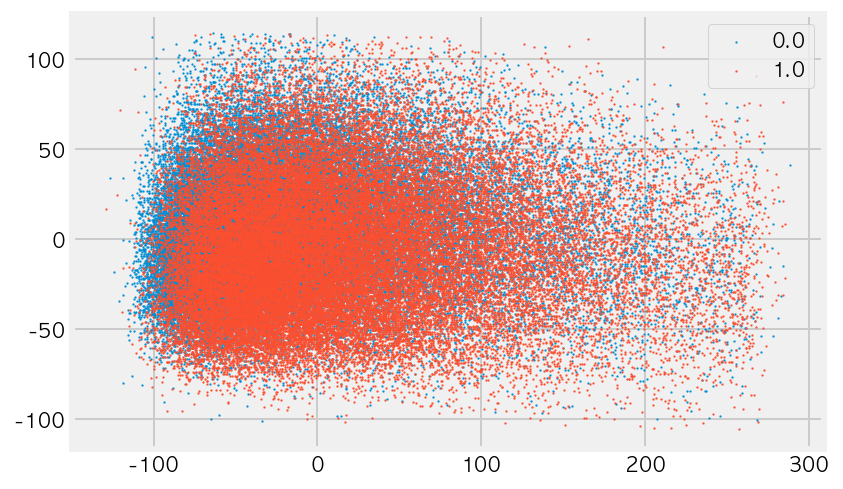

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

pca = PCA()
pca1 = pca.fit_transform(x_rus1)

counter = Counter(y_rus1)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus1 == label)[0]
    plt.scatter(pca1[row_ix, 0], pca1[row_ix, 1], label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

Counter({0.0: 58223, 1.0: 46579})


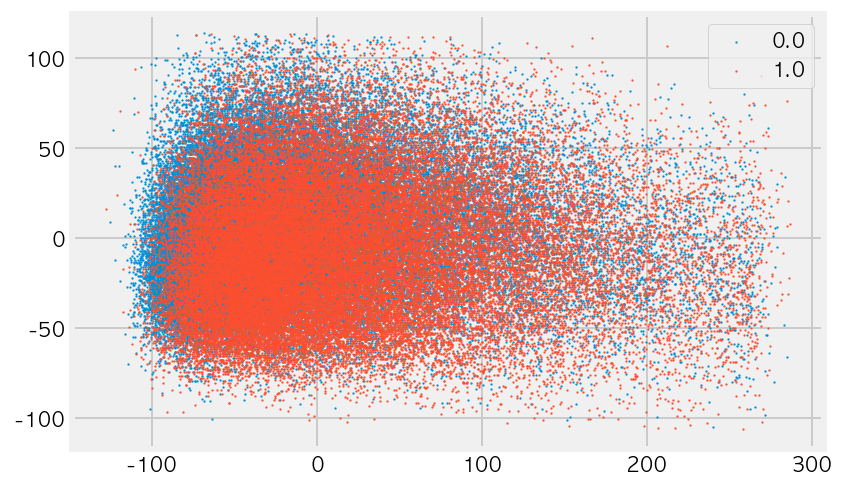

In [22]:
pca = PCA()
pca08 = pca.fit_transform(x_rus08)

counter = Counter(y_rus08)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus08 == label)[0]
    plt.scatter(pca08[row_ix, 0], pca08[row_ix, 1],label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

Counter({0.0: 77631, 1.0: 46579})


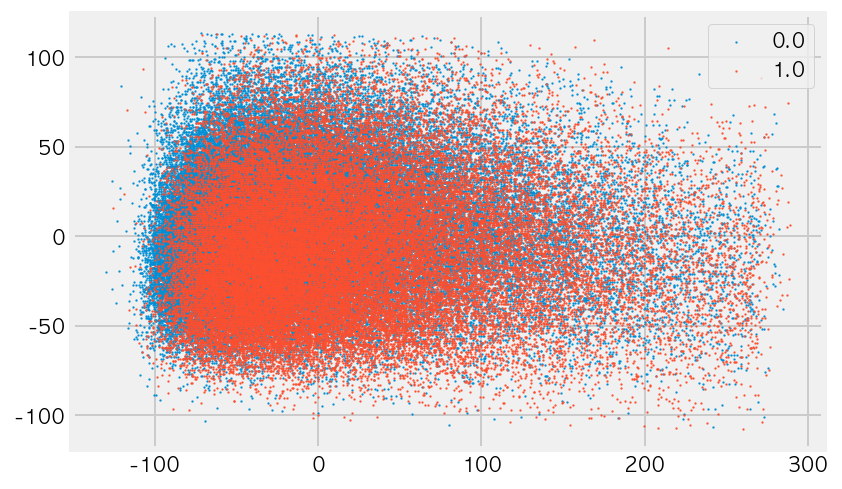

In [23]:
pca = PCA()
pca06 = pca.fit_transform(x_rus06)

counter = Counter(y_rus06)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus06 == label)[0]
    plt.scatter(pca06[row_ix, 0], pca06[row_ix, 1], label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

Counter({0.0: 116447, 1.0: 46579})


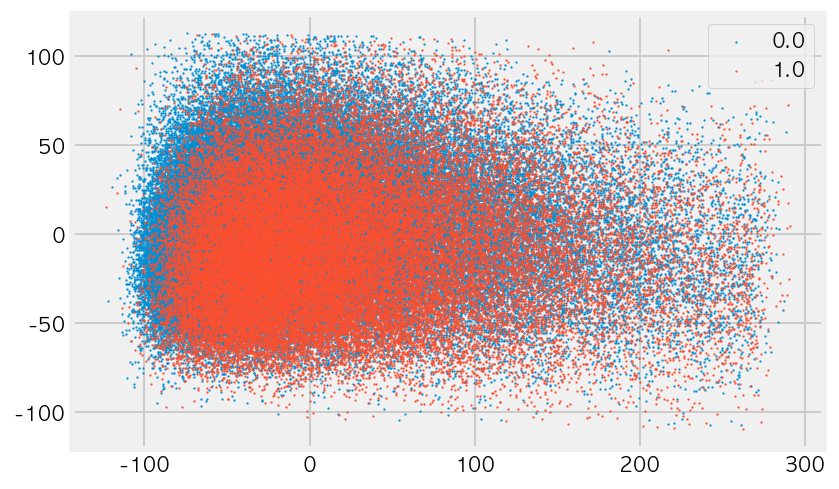

In [24]:
pca = PCA()
pca04 = pca.fit_transform(x_rus04)

counter = Counter(y_rus04)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus04 == label)[0]
    plt.scatter(pca04[row_ix, 0], pca04[row_ix, 1], label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

Counter({0.0: 232895, 1.0: 46579})


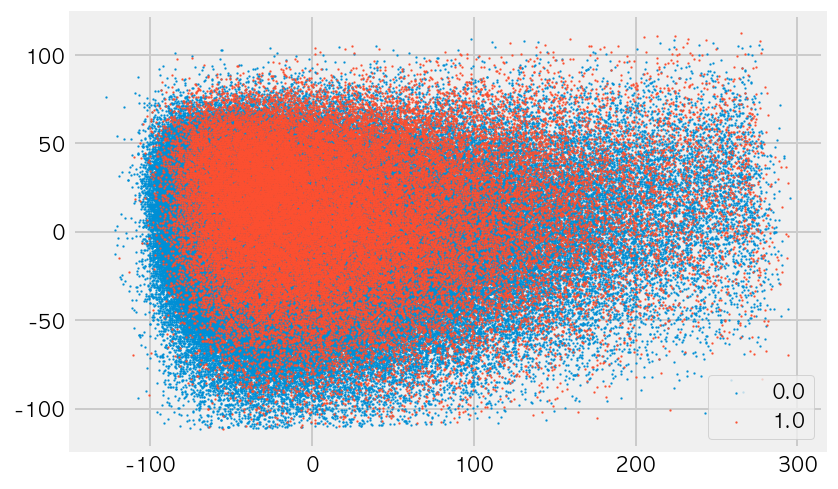

In [25]:
pca = PCA()
pca02 = pca.fit_transform(x_rus02)

counter = Counter(y_rus02)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_rus02 == label)[0]
    plt.scatter(pca02[row_ix, 0], pca02[row_ix, 1], label=str(label), linewidth = 0.1,s=1)

plt.legend()
plt.show()

## 언더샘플링 한 데이터로 xgboost 돌려보기

In [26]:
# 데이터셋 변경 방지
seed = 7

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_rus1, y_rus1, test_size=0.2, random_state=seed)
X_train08, X_test08, y_train08, y_test08 = train_test_split(x_rus08, y_rus08, test_size=0.2, random_state=seed)
X_train06, X_test06, y_train06, y_test06 = train_test_split(x_rus06, y_rus06, test_size=0.2, random_state=seed)
X_train04, X_test04, y_train04, y_test04 = train_test_split(x_rus04, y_rus04, test_size=0.2, random_state=seed)
X_train02, X_test02, y_train02, y_test02 = train_test_split(x_rus02, y_rus02, test_size=0.2, random_state=seed)

In [27]:
model1 = xgb.XGBClassifier()
model08 = xgb.XGBClassifier()
model06 = xgb.XGBClassifier()
model04 = xgb.XGBClassifier()
model02 = xgb.XGBClassifier()

model1.fit(X_train1, y_train1)
model08.fit(X_train08, y_train08)
model06.fit(X_train06, y_train06)
model04.fit(X_train04, y_train04)
model02.fit(X_train02, y_train02)

[08:39:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
# make predictions for test data(y, 당뇨여부)
pred1 = model1.predict(X_test1)
pred08 = model08.predict(X_test08)
pred06 = model06.predict(X_test06)
pred04 = model04.predict(X_test04)
pred02 = model02.predict(X_test02)

predictions1 = [round(value) for value in pred1] # 혹시 예측 결과값 y_pred가 어떤 확률 값으로 얻어지는 경우, 그 값을 0 아니면 1로 만들어 predictions로 저장
predictions08 = [round(value) for value in pred08]
predictions06 = [round(value) for value in pred06]
predictions04 = [round(value) for value in pred04]
predictions02 = [round(value) for value in pred02]


In [30]:
rmse1 = np.sqrt(mean_squared_error(y_test1, pred1))
rmse08 = np.sqrt(mean_squared_error(y_test08, pred08))
rmse06 = np.sqrt(mean_squared_error(y_test06, pred06))
rmse04 = np.sqrt(mean_squared_error(y_test04, pred04))
rmse02 = np.sqrt(mean_squared_error(y_test02, pred02))

print("RMSE1: %f" % (rmse1)) # RMSE가 낮으면 더 좋은 모델
print("RMSE08: %f" % (rmse08))
print("RMSE06: %f" % (rmse06))
print("RMSE04: %f" % (rmse04))
print("RMSE02: %f" % (rmse02))

RMSE1: 0.544351
RMSE08: 0.546227
RMSE06: 0.534044
RMSE04: 0.504686
RMSE02: 0.409280


In [31]:
# evaluate predictions
accuracy1 = accuracy_score(y_test1, predictions1)
accuracy08 = accuracy_score(y_test08, predictions08)
accuracy06 = accuracy_score(y_test06, predictions06)
accuracy04 = accuracy_score(y_test04, predictions04)
accuracy02 = accuracy_score(y_test02, predictions02)

print("Accuracy1: %.2f%%" % (accuracy1 * 100.0))
print("Accuracy08: %.2f%%" % (accuracy08 * 100.0))
print("Accuracy06: %.2f%%" % (accuracy06 * 100.0))
print("Accuracy04: %.2f%%" % (accuracy04 * 100.0))
print("Accuracy02: %.2f%%" % (accuracy02 * 100.0))

Accuracy1: 70.37%
Accuracy08: 70.16%
Accuracy06: 71.48%
Accuracy04: 74.53%
Accuracy02: 83.25%


In [32]:
print('undersampling 비율 1 model 비당뇨 사람 수 :',len(pred1[pred1 == 0])) 
print('undersampling 비율 1 model 당뇨 사람 수 :',len(pred1[pred1 == 1])) 
print(sep='\n')

print('undersampling 비율 0.8 model 비당뇨 사람 수 :',len(pred08[pred08 == 0])) 
print('undersampling 비율 0.8 model 당뇨 사람 수 :',len(pred08[pred08 == 1])) 
print(sep='\n')

print('undersampling 비율 0.6 model 비당뇨 사람 수 :',len(pred06[pred06 == 0]))
print('undersampling 비율 0.6 model 당뇨 사람 수 :',len(pred06[pred06 == 1])) 
print(sep='\n')

print('undersampling 비율 0.4 model 비당뇨 사람 수 :',len(pred04[pred04 == 0])) 
print('undersampling 비율 0.4 model 당뇨 사람 수 :',len(pred04[pred04 == 1])) 
print(sep='\n')

print('undersampling 비율 0.2 model 비당뇨 사람 수 :',len(pred02[pred02 == 0])) 
print('undersampling 비율 0.2 model 당뇨 사람 수 :',len(pred02[pred02 == 1])) 

undersampling 비율 1 model 비당뇨 사람 수 : 8369
undersampling 비율 1 model 당뇨 사람 수 : 10263

undersampling 비율 0.8 model 비당뇨 사람 수 : 11117
undersampling 비율 0.8 model 당뇨 사람 수 : 9844

undersampling 비율 0.6 model 비당뇨 사람 수 : 16236
undersampling 비율 0.6 model 당뇨 사람 수 : 8606

undersampling 비율 0.4 model 비당뇨 사람 수 : 26508
undersampling 비율 0.4 model 당뇨 사람 수 : 6098

undersampling 비율 0.2 model 비당뇨 사람 수 : 54550
undersampling 비율 0.2 model 당뇨 사람 수 : 1345


## TP FP FN FP 

### undersampling 비율 0.8로 계산

In [33]:
from sklearn import metrics

(tn, fp, fn, tp) = metrics.confusion_matrix(y_test08, pred08).ravel()

print(tn,fp,fn,tp)

8262 3399 2855 6445


In [34]:
P = tp + fn
N = fp + tn
ACC = (tp + tn)  / (P + N)

print(ACC)
#위에 구해놓았던 정확도와 일치

0.7016363723104814


In [35]:
precision = tp/(tp+fp)
print("Precision : ",precision)

recall = tp/P
print("Recall : ",recall)

f_score = (precision*recall*2)/(precision+recall)
print("F score : ",f_score)

Precision :  0.6547135310849248
Recall :  0.693010752688172
F score :  0.6733180108650229


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y_test1, pred1))
print(classification_report(y_test08, pred08))
# print(classification_report(y_test06, pred06))
# print(classification_report(y_test04, pred04))
# print(classification_report(y_test02, pred02)) 
#위 계산값과 값 일치


              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73     11661
         1.0       0.65      0.69      0.67      9300

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961



In [37]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = metrics.roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], "k--", label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

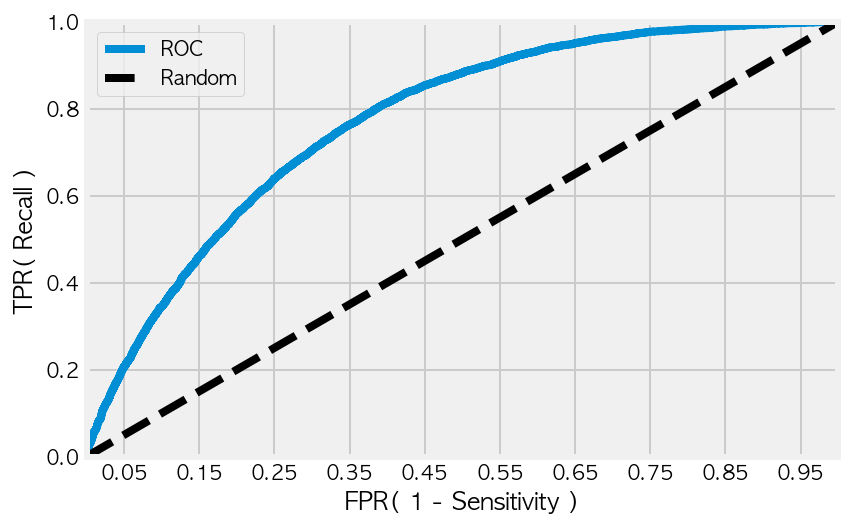

In [38]:
roc_curve_plot(y_test08, model08.predict_proba(X_test08)[:, 1])

In [39]:
roc_auc = metrics.roc_auc_score(y_test08, model08.predict_proba(X_test08)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7721
